In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt

from duke_dbt_data import dcmread_image, read_boxes, draw_box

In [7]:
base_path = "/mnt/mia_images/breast/DBT-Challenge"
df = read_boxes(boxes_fp=base_path+"/BCS-DBT boxes-train.csv", filepaths_fp=base_path+"/BCS-DBT file-paths-train.csv")

In [14]:
box_series = df.iloc[0]
print(box_series)
view = box_series["View"]
slice_index = box_series["Slice"]
# if you have image data saved in classic path folder structure, read the file path from "classic_path"
# image_path = os.path.join("/data", view_series["classic_path"])
image_path = os.path.join(base_path, box_series["descriptive_path"])

PatientID                                                  DBT-P00013
StudyUID                                                   DBT-S00163
View                                                             rmlo
Subject                                                             0
Slice                                                              16
X                                                                1116
Y                                                                1724
Width                                                             218
Height                                                            105
Class                                                          benign
AD                                                                  0
descriptive_path    Breast-Cancer-Screening-DBT/DBT-P00013/01-01-2...
classic_path        Breast-Cancer-Screening-DBT/DBT-P00013/1.2.826...
Name: 0, dtype: object


In [10]:
%%time
image = dcmread_image(fp=image_path, view=view, index=slice_index)

/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/openjpeg/utils.py:189: UserWarning: The (0028,0101) Bits Stored value '10' in the dataset does not match the component precision value '16' found in the JPEG 2000 data. It's recommended that you change the Bits Stored value to produce the correct output
  warnings.warn(


CPU times: user 13.6 s, sys: 380 ms, total: 14 s
Wall time: 18.3 s


In [12]:
x, y, width, height = box_series[["X", "Y", "Width", "Height"]]
image = draw_box(image=image, x=x, y=y, width=width, height=height, lw=10)

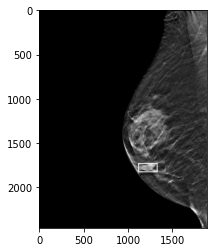

In [13]:
plt.imshow(image, cmap=plt.cm.gray);